In [34]:
import pickle as pkl

In [35]:
with open("F:\\DeepLearning\\Model\\20181004-214808\\results\\LR\\BL_beforeGA_LR_3days.pkl", "rb") as file:
    results = pkl.load(file)

In [38]:
results.keys()

dict_keys(['equity', 'returns', 'cum_returns', 'tot_return', 'annual_return', 'cagr', 'drawdown', 'max_drawdown', 'max_drawdown_duration', 'sharpe', 'sortino', 'IR', 'rolling_return_year', 'bench_equity', 'bench_returns', 'bench_cum_returns'])

In [39]:
results['tot_return']

0.5122438076326359

In [40]:
results['annual_return']

0.09320488025219945

In [41]:
results['cagr']

0.07815929755741147

In [42]:
results['max_drawdown']

0.41054570136420426

In [43]:
results['sharpe']

0.7069862918327935

In [44]:
results['sortino']

1.0287370480042248

In [45]:
results['IR']

0.5662508239555826

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from cvxopt import solvers, matrix 
%matplotlib inline

In [2]:
from blacklitterman import BlackLitterman

In [3]:
def plot(data):
    plt.figure(figsize=(10,5))
    plt.plot(data)
    plt.show()

In [4]:
modelpath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120")
datapath = "F:\\DeepLearning\\data\\outsample_total"
resultspath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120\\results")
avgresultspath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120\\results_avg")

In [5]:
modelpath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120")
datapath = "F:\\DeepLearning\\data\\outsample_total"
resultspath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120\\results")
avgresultspath = os.path.join("F:\\DeepLearning\\Model\\20181003-135120\\results_avg")

if not os.path.exists(resultspath):
    os.makedirs(resultspath)
if not os.path.exists(avgresultspath):
    os.makedirs(avgresultspath)

GAtypeList = ['beforeGA', 'afterGA']
frequencyList = [3, 5, 7, 10, 12, 15, 18, 20, 25, 30]
modelList = ['LR', 'RF', 'SVM', 'DNN', 'NB', 'GBM', 'BAG', 'ET', 'ADA', 'EXS']

In [6]:
return_data = pd.read_hdf(os.path.join(datapath, "return_data.h5"))
mean_cum_returns = pd.read_hdf(os.path.join(datapath, "mean_cum_returns.h5"))
market_data = pd.read_hdf(os.path.join(datapath, "market_data.h5"))
risk_free = pd.read_hdf(os.path.join(datapath, "risk_free.h5"))

In [7]:
GAtype = GAtypeList[0]
modelname = modelList[0]
frequency = frequencyList[4]

In [8]:
saveGApath = os.path.join(modelpath, GAtype)
savemodelpath = os.path.join(saveGApath, modelname)
saveresultspath = os.path.join(resultspath, modelname)

In [9]:
Y_portfolio = np.load(os.path.join(datapath, "prices_" + str(frequency) + "days.npy"))
days = np.load(os.path.join(datapath, "todays_" + str(frequency) + "days.npy"))

fname = modelname + "_" + str(frequency) + "days_portfolio_probas.npy"
pred_data = np.load(os.path.join(savemodelpath, fname))

# fname = modelname + "_" + str(frequency) + "days_portfolios.npy"
# pred_data = np.load(os.path.join(savemodelpath, fname))

In [10]:
a = 20180629

'20180629'

Timestamp('2018-06-29 00:00:00')

In [32]:
days = 

In [33]:
days[0]

Timestamp('2012-12-31 00:00:00')

In [16]:
pd.to_datetime()

DatetimeIndex(['1970-01-01 00:00:00.020121231',
               '1970-01-01 00:00:00.020130121',
               '1970-01-01 00:00:00.020130206',
               '1970-01-01 00:00:00.020130301',
               '1970-01-01 00:00:00.020130319',
               '1970-01-01 00:00:00.020130408',
               '1970-01-01 00:00:00.020130424',
               '1970-01-01 00:00:00.020130515',
               '1970-01-01 00:00:00.020130531',
               '1970-01-01 00:00:00.020130621',
               ...
               '1970-01-01 00:00:00.020180130',
               '1970-01-01 00:00:00.020180222',
               '1970-01-01 00:00:00.020180312',
               '1970-01-01 00:00:00.020180328',
               '1970-01-01 00:00:00.020180417',
               '1970-01-01 00:00:00.020180507',
               '1970-01-01 00:00:00.020180523',
               '1970-01-01 00:00:00.020180608',
               '1970-01-01 00:00:00.020180627',
               '1970-01-01 00:00:00.020180629'],
              dtype=

In [32]:
bl = BlackLitterman(return_data, mean_cum_returns, market_data, risk_free, pred_data, days, frequency)#, pred_data_kind="bool")

Dataview loaded successfully.


In [ ]:
weights = bl.get_weights()

In [76]:
for i in range(len(weights)):
    print(i, "\t", np.max(weights[i]), "\t", np.min(weights[i]))

0 	 0.01999999890125202 	 -0.019999997059994744
1 	 0.01999999726072447 	 -0.01999999440418224
2 	 0.01999999944157594 	 -0.019999999065242094
3 	 0.019999993226799396 	 -0.01999998922214719
4 	 0.019999989721180035 	 -0.019999983015476182
5 	 0.019999984278263973 	 -0.019999976920957566
6 	 0.019999996261184837 	 -0.01999999224256869
7 	 0.01999999259766491 	 -0.019999992797668228
8 	 0.019999970154586637 	 -0.01999997644775654
9 	 0.019999997428688094 	 -0.019999998385287234
10 	 0.01999998179395814 	 -0.01999999423914889
11 	 0.019999996631589273 	 -0.019999988043920357
12 	 0.019999965454547432 	 -0.019999864758614226
13 	 0.019999971538386247 	 -0.019999919215141333
14 	 0.019999997261810135 	 -0.019999986438331153
15 	 0.01999999860313122 	 -0.019999994366044646
16 	 0.01999999801962725 	 -0.019999993912187847
17 	 0.01999999711232523 	 -0.0199999854391168
18 	 0.019999908308307276 	 -0.0199999580702099
19 	 0.019999996098002043 	 -0.019999996751690254
20 	 0.019999961713504034 	

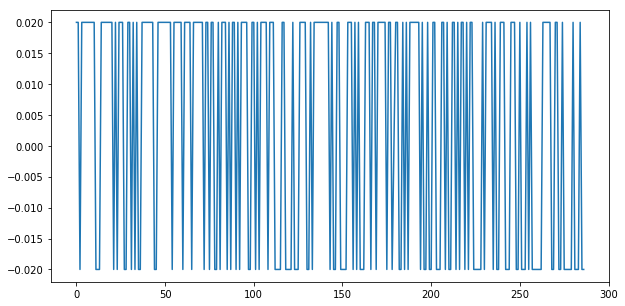

In [77]:
plot(weights[60])

In [33]:
self = bl

In [37]:
index = 60

In [38]:
today = self.days[index]
today_status = self.trade_status.loc[today]
today_stock = self.index_member.columns[self.index_member.loc[today] == 1.0].values
today_stock = np.array([stock for stock in today_stock if today_status[stock]])

i = np.where(self.return_data.index == today)[0][0]
today_daily_return = self.return_data.iloc[i - self.cum_freq + 1:i + 1][today_stock]
today_mean_cum_returns = self.mean_cum_returns.loc[today, today_stock]
today_mkt_return = self.market_data.iloc[i - self.cum_freq + 1:i + 1]['market_data']
today_risk_free = self.risk_free.loc[today]
pred_data = self.pred_data[index]

In [44]:
today_mean_cum_returns['601998']

0.05318923318020263

In [49]:
sss = pd.read_hdf("F:\\DeepLearning\\Model\\20181003-135120\\outsample_total\\return_data.h5")

In [59]:
aaa = sss.iloc[300:350][today_stock]

In [ ]:
return_data

In [48]:
today_daily_return['601727']

date
20150923   -0.014178
20150924    0.018613
20150925   -0.052326
20150928    0.008764
20150929   -0.038228
20150930    0.014453
20151008         NaN
20151009         NaN
20151012         NaN
20151013         NaN
20151014         NaN
20151015         NaN
20151016         NaN
20151019         NaN
20151020         NaN
20151021         NaN
20151022         NaN
20151023         NaN
20151026         NaN
20151027         NaN
20151028         NaN
20151029         NaN
20151030         NaN
20151102         NaN
20151103         NaN
20151104         NaN
20151105         NaN
20151106         NaN
20151109         NaN
20151110         NaN
20151111         NaN
20151112         NaN
20151113         NaN
20151116         NaN
20151117         NaN
20151118         NaN
20151119         NaN
20151120         NaN
20151123         NaN
20151124         NaN
20151125         NaN
20151126         NaN
20151127         NaN
20151130         NaN
20151201         NaN
20151202         NaN
20151203         NaN
20151204

In [47]:
np.sum(np.isnan(today_daily_return))

stock
000001     0
000009     0
000027     0
000039     0
000046     0
000060     0
000061     0
000063     0
000069     0
000100     0
000156     0
000157     0
000166     0
000333     0
000338     0
000400     0
000402     0
000413     0
000415     5
000423     0
000425     0
000503     0
000538     0
000539     0
000540    13
000559     0
000568     0
000581     0
000598     0
000623     0
          ..
601688     0
601699     0
601718     0
601727    42
601766     0
601788     0
601800     0
601808     0
601818     3
601857     0
601872     0
601888     0
601898     0
601899     0
601901     0
601928     0
601933     0
601939     0
601958     0
601969     1
601985     0
601988     0
601989     0
601991     0
601992     0
601998     2
603000     0
603288     0
603885     0
603993     0
Length: 284, dtype: int64

In [ ]:


cov = self.get_cov(today_daily_return)
pi = self.get_pi(today_stock, today_risk_free, today_mkt_return, today_daily_return)
q, P, Omega = self.get_q_P_Omega(pred_data, today_mean_cum_returns)

# miu
first_part = ((self.tau * cov).I + np.matrix(np.dot(np.dot(P.T, 1/Omega), P))).I
second_part = np.dot((self.tau * cov).I, pi) + np.dot(np.dot(P.T, 1/Omega), q)
miu = np.dot(first_part, second_part)

# V
V = first_part

PP = matrix(self.delta * V)
qq = matrix(-1 * pi)
GG = matrix(np.concatenate((-1 * np.eye(len(pi)), np.eye(len(pi)))))
hh = matrix(np.concatenate((0.2 * np.ones(len(pi)), 0.2 * np.ones(len(pi)))))
# hh = matrix(np.concatenate((np.zeros(len(pi)), 0.02 * np.ones(len(pi)))))
AA = matrix(np.ones(len(pi)).reshape(1, -1))
bb = matrix([1.0])

solvers.options['show_progress'] = False
sol = solvers.qp(PP, qq, GG, hh, AA, bb)

x = np.array(sol['x'])

print(index, "\t", np.max(x), "\t", np.min(x))

In [80]:
for index in range(len(self.days)):
    today = self.days[index]
    today_status = self.trade_status.loc[today]
    today_stock = self.index_member.columns[self.index_member.loc[today] == 1.0].values
    today_stock = np.array([stock for stock in today_stock if today_status[stock]])

    i = np.where(self.return_data.index == today)[0][0]
    today_daily_return = self.return_data.iloc[i - self.cum_freq + 1:i + 1][today_stock]
    today_mean_cum_returns = self.mean_cum_returns.loc[today, today_stock]
    today_mkt_return = self.market_data.iloc[i - self.cum_freq + 1:i + 1]['mkt_return']
    today_risk_free = self.risk_free.loc[today]
    pred_data = self.pred_data[index]

    cov = self.get_cov(today_daily_return)
    pi = self.get_pi(today_stock, today_risk_free, today_mkt_return, today_daily_return)
    q, P, Omega = self.get_q_P_Omega(pred_data, today_mean_cum_returns)

    # miu
    first_part = ((self.tau * cov).I + np.matrix(np.dot(np.dot(P.T, 1/Omega), P))).I
    second_part = np.dot((self.tau * cov).I, pi) + np.dot(np.dot(P.T, 1/Omega), q)
    miu = np.dot(first_part, second_part)

    # V
    V = first_part

    PP = matrix(self.delta * V)
    qq = matrix(-1 * pi)
    GG = matrix(np.concatenate((-1 * np.eye(len(pi)), np.eye(len(pi)))))
    hh = matrix(np.concatenate((0.2 * np.ones(len(pi)), 0.2 * np.ones(len(pi)))))
    # hh = matrix(np.concatenate((np.zeros(len(pi)), 0.02 * np.ones(len(pi)))))
    AA = matrix(np.ones(len(pi)).reshape(1, -1))
    bb = matrix([1.0])

    solvers.options['show_progress'] = False
    sol = solvers.qp(PP, qq, GG, hh, AA, bb)

    x = np.array(sol['x'])

    print(index, "\t", np.max(x), "\t", np.min(x))

0 	 0.19999999697573026 	 -0.19999999435092136
1 	 0.19999999820384823 	 -0.19999999767364393
2 	 0.19996513636424137 	 -0.19995423922126312
3 	 0.19999999293748622 	 -0.19999999164206894
4 	 0.19999994241906868 	 -0.19999993593301196
5 	 0.19999992783560977 	 -0.19999992657528784
6 	 0.1999999993137727 	 -0.19999999883385436
7 	 0.1999999680672367 	 -0.19999997153775326
8 	 0.19999999619667516 	 -0.19999999747852387
9 	 0.199998945722579 	 -0.19999937011341876
10 	 0.19999754081496307 	 -0.19999947111547559
11 	 0.19999999223401144 	 -0.19999997935145827
12 	 0.19999999687907855 	 -0.1999999902161759
13 	 0.19999998953895523 	 -0.19999997834651653
14 	 0.19999999691238488 	 -0.199999988758196
15 	 0.1999999967810008 	 -0.1999999891842886
16 	 0.1999998133504219 	 -0.19999943504260526
17 	 0.19818522762767193 	 -0.1383097708094352
18 	 0.1994302147401222 	 -0.19982180190537896
19 	 0.19999998030229793 	 -0.1999999868088691
20 	 0.19999996490577304 	 -0.19999997179424525
21 	 0.19999998

In [81]:
rank = pred_data.argsort().argsort()

In [82]:
rank

array([139,   3, 130,  81, 154, 266, 185, 233,  90, 151, 204, 190,  24,
       119,  56,   7, 102,   5, 141,  95, 209, 170,   0, 178, 220, 282,
       223,  97, 225, 245,  79, 198, 150, 171,   8, 131,  20, 109,  88,
       216, 186,  28, 180, 199, 152,  10,  19,  13,  67, 138,  66,  40,
        84,  47, 108, 269, 121,  31, 172,  52,  15,  64,  30,  11, 105,
       127, 157,  22,  96,  51,  74, 126,  43, 122, 231,  42,  60, 116,
        34, 110,  98, 149, 135, 217, 107, 236, 230,  54, 117,  44,  70,
        91, 148,  39,  72, 106,  59,  35,  32,  26,  38,  57, 136, 147,
       254, 238,  37, 241, 219, 276, 280, 248, 132, 252, 263, 212, 240,
       250,  89, 244, 100, 163, 257, 167,  25, 210,  49, 129, 134,  46,
       213, 160, 242,  61, 173, 206, 189, 125,  93, 165,  62, 256, 191,
        76,  53,   2, 177,   6,  50,  99,  68, 143, 179,  58, 232, 162,
        92, 200, 164, 133,  48,  41, 124,  14, 118, 146,  65, 184, 103,
        29,  27,   1, 112,  55, 159, 115,  21, 137,  85,  12,  4

In [83]:
np.where(x > 0.015)

(array([  3,   4,   5,   6,   7,  10,  12,  14,  15,  16,  18,  19,  20,
         21,  27,  29,  32,  35,  38,  40,  45,  49,  51,  54,  58,  64,
         65,  66,  70,  73,  77,  78,  80,  81,  82,  84,  85,  88,  89,
         92,  97, 100, 104, 105, 106, 107, 108, 109, 110, 111, 113, 115,
        118, 120, 123, 124, 126, 127, 128, 129, 132, 133, 135, 136, 138,
        141, 142, 143, 144, 147, 151, 153, 155, 156, 157, 159, 161, 162,
        163, 165, 167, 170, 173, 174, 175, 176, 179, 180, 182, 183, 184,
        185, 186, 189, 190, 191, 192, 193, 194, 196, 197, 199, 200, 202,
        203, 205, 206, 208, 209, 211, 214, 215, 217, 222, 223, 224, 227,
        228, 231, 233, 235, 240, 242, 244, 245, 247, 248, 249, 250, 253,
        255, 256, 257, 261, 262, 265, 267, 270, 273, 274, 275, 276, 278,
        279, 280, 282], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 

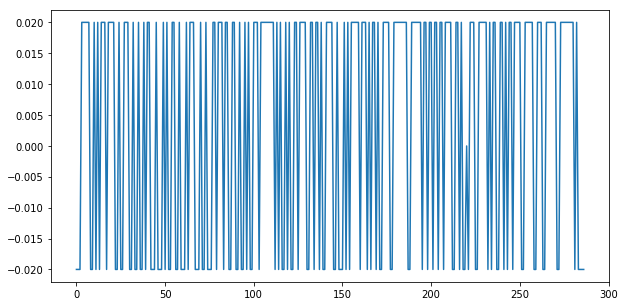

In [25]:
plot(x)

In [17]:
index = 60
today = self.days[index]
today_status = self.trade_status.loc[today]
today_stock = self.index_member.columns[self.index_member.loc[today] == 1.0].values
today_stock = np.array([stock for stock in today_stock if today_status[stock]])

i = np.where(self.return_data.index == today)[0][0]
today_daily_return = self.return_data.iloc[i - self.cum_freq + 1:i + 1][today_stock]
today_mean_cum_returns = self.mean_cum_returns.loc[today, today_stock]
today_mkt_return = self.market_data.iloc[i - self.cum_freq + 1:i + 1]['mkt_return']
today_risk_free = self.risk_free.loc[today]
pred_data = self.pred_data[index]

cov = self.get_cov(today_daily_return)
pi = self.get_pi(today_stock, today_risk_free, today_mkt_return, today_daily_return)
q, P, Omega = self.get_q_P_Omega(pred_data, today_mean_cum_returns)

# miu
first_part = ((self.tau * cov).I + np.matrix(np.dot(np.dot(P.T, 1/Omega), P))).I
second_part = np.dot((self.tau * cov).I, pi) + np.dot(np.dot(P.T, 1/Omega), q)
miu = np.dot(first_part, second_part)

# V
V = first_part

P = matrix(self.delta * V)
q = matrix(-1 * pi)
G = matrix(np.concatenate((-1 * np.eye(len(pi)), np.eye(len(pi)))))
h = matrix(np.concatenate((np.zeros(len(pi)), 0.02 * np.ones(len(pi)))))
# h = matrix(np.concatenate((0.02 * np.ones(len(pi)), 0.02 * np.ones(len(pi)))))
# A = matrix(np.ones(len(pi)).reshape(1, -1))
# b = matrix([1.0])

solvers.options['show_progress'] = False
sol = solvers.qp(P,q,G,h)#,A,b) 

x = np.array(sol['x'])

print(index, ":\t", np.max(x))

60 :	 0.019999997828650008


In [18]:
today_risk_free

risk_free    0.0041
Name: 20171213, dtype: float64

In [19]:
mean_mkt_return - 

array([-0.00319627])

In [16]:
betas * (mean_mkt_return - today_risk_free)

ValueError: Length of passed values is 287, index implies 1

In [15]:
mean_mkt_return = np.mean(today_mkt_return)
var_mkt_return = np.var(today_mkt_return)

betas = []
for stock in today_stock:
    beta = np.cov(today_daily_return[stock], today_mkt_return)
    betas.append(beta[1, 0])
betas = np.array(betas) / var_mkt_return

pi = betas * (mean_mkt_return - today_risk_free) + today_risk_free

ValueError: Length of passed values is 287, index implies 1

In [88]:
pi

matrix([[ 1.83942398e-03],
        [ 1.28483210e-03],
        [ 3.63297437e-04],
        [ 5.32574978e-04],
        [ 2.09388565e-03],
        [ 1.01739981e-03],
        [ 1.89913763e-03],
        [ 5.13548915e-04],
        [ 5.53794139e-04],
        [ 2.14497525e-03],
        [ 1.49703196e-03],
        [ 3.62922334e-04],
        [ 3.61812394e-04],
        [ 4.51687281e-04],
        [ 7.21195203e-04],
        [ 9.43448821e-04],
        [ 6.54481694e-04],
        [ 1.26099416e-03],
        [ 8.19119743e-04],
        [ 1.76626943e-03],
        [ 1.12879358e-03],
        [ 4.47275212e-04],
        [ 1.24641459e-03],
        [ 1.72611397e-04],
        [ 1.83893052e-03],
        [ 8.31639937e-04],
        [ 6.06619742e-04],
        [ 4.25322835e-04],
        [ 7.59828342e-05],
        [ 2.41962730e-03],
        [ 6.65073097e-04],
        [ 3.78822055e-04],
        [ 5.77363793e-04],
        [ 2.00083225e-04],
        [ 8.97855602e-04],
        [ 4.66901969e-04],
        [ 4.63254149e-04],
 

In [37]:
sum(x>0.0015)

array([0])

In [38]:
sum(x<-0.015)

array([0])

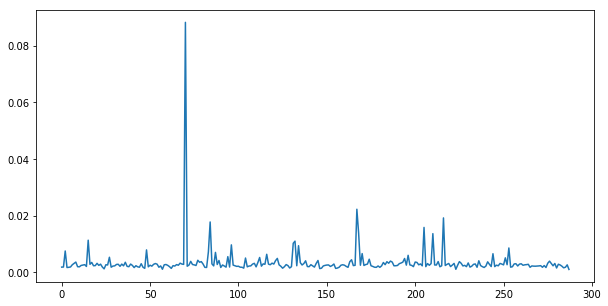

In [35]:
plot(x / sum(x))

In [39]:
sum(x)

array([4.6201998e-06])

In [607]:
from model import *
import numpy as np
import pandas as pd
from datetime import datetime
import os
import pickle as pkl

Using TensorFlow backend.


In [594]:
with open("F:\\DeepLearning\\Model\\result_GA.pkl", "rb") as file:
    GA = pkl.load(file)

In [596]:
GA.keys()

dict_keys(['best_factors', 'best_factorsList', 'best_probs', 'best_probsList'])

In [598]:
sum(GA['best_factors'])

195.0

In [599]:
GA['best_probs']

0.02009557404826736

In [614]:
GA_factor = GA['best_factors'].astype(np.int)

In [617]:
GA_factor

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1])

In [608]:
modelpath = os.path.join("F:\\DeepLearning\\Model", datetime.now().strftime("%Y%m%d-%H%M%S"))

In [609]:
fpath = "F:\\DeepLearning\\Data"
fpath_insample = os.path.join(fpath, "insample")
fpath_outsample = os.path.join(fpath, "outsample")
X_train = np.load(os.path.join(fpath_insample, "X.npy"))
Y_train = np.load(os.path.join(fpath_insample, "Y.npy"))
X_test = np.load(os.path.join(fpath_outsample, "X.npy"))
Y_test = np.load(os.path.join(fpath_outsample, "Y.npy"))

In [625]:
X_train[:, GA_factor == 1].shape

(70380, 195)

In [626]:
X_train.shape[1]

229

In [1]:
from dataview import DataView
import pandas as pd
import numpy as np
import os 

In [2]:
dv = DataView()

In [3]:
BASICINFOR_NAME = "basic_infor"
FININDICATOR_NAME = "finIndicator"
TECHNICALINDEX_NAME = "technical_index"
fpath = "F:\\DeepLearning\\Data\\outsample\\"

basic_path = os.path.join(fpath, BASICINFOR_NAME)
fin_path = os.path.join(fpath, FININDICATOR_NAME)
tech_path = os.path.join(fpath, TECHNICALINDEX_NAME)

In [4]:
dv.load_dataview(basic_path)

Dataview loaded successfully.


In [6]:
dv.data_benchmark.to_hdf("F:\\DeepLearning\\data\\outsample_total\\benchmark.h5", key = "benchmark")

In [78]:
dv.start_date

20041231

In [79]:
dv.end_date

20180701

In [80]:
start_date = 20041231
end_date = 20121231

In [81]:
# start_date = 20121231
# end_date = 20180701

In [82]:
dv.reflash_data(start_date=start_date, end_date=end_date)

In [83]:
fsavepath = "F:\\DeepLearning\\Data\\insample\\"

In [84]:
fffbasic_path = os.path.join(fsavepath, BASICINFOR_NAME)
ffffin_path = os.path.join(fsavepath, FININDICATOR_NAME)
ffftech_path = os.path.join(fsavepath, TECHNICALINDEX_NAME)

In [85]:
dv.start_date

20041231

In [86]:
dv.end_date

20121231

In [88]:
dv.save_dataview(fffbasic_path)

Dataview has been successfully saved to:
F:\DeepLearning\Data\insample\basic_infor


In [5]:
from dataview import DataView
import pandas as pd
import numpy as np
import os 

In [6]:
BASICINFOR_NAME = "basic_infor"
FININDICATOR_NAME = "finIndicator"
TECHNICALINDEX_NAME = "technical_index"
fpath = "F:\\DeepLearning\\Data\\total\\"

basic_path = os.path.join(fpath, BASICINFOR_NAME)
fin_path = os.path.join(fpath, FININDICATOR_NAME)
tech_path = os.path.join(fpath, TECHNICALINDEX_NAME)

In [7]:
dv = DataView()
dv.load_dataview(basic_path)

Dataview loaded successfully.


In [120]:
dvnew = DataView()
dvnew.load_dataview(tech_path)

Dataview loaded successfully.


In [121]:
len(dv.fields)

123

In [122]:
len(dvnew.fields)

106

In [123]:
dv.data_d = pd.merge(dv.data_d, dvnew.data_d, left_index=True, right_index=True, how='left')

In [124]:
dv.data_d = dv.data_d.sort_index(axis=1)

In [125]:
dv.data_d.columns = dv.data_d.columns.remove_unused_levels()

In [126]:
dv.fields = dv.fields + dvnew.fields

In [127]:
dv.save_dataview(fpath)

Dataview has been successfully saved to:
F:\DeepLearning\Data\insample


In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_hdf("F:\\DeepLearning\\data\\return_data\\df.h5")

In [3]:
df = df.set_index(['stock', 'date'])

In [8]:
df = df.unstack().T

In [13]:
df.index = df.index.levels[1]

In [15]:
df.to_hdf("F:\\DeepLearning\\data\\return_data\\return_data.h5", key = "return_data")

In [20]:
dff = pd.read_hdf("F:\\DeepLearning\\data\\return_data.h5")

In [27]:
df['date'] = df['date'].apply(lambda x: int(x.strftime("%Y%m%d")))

In [29]:
df = df.set_index("date")

In [31]:
df = df.sort_index()

In [33]:
df.to_hdf("F:\\DeepLearning\\data\\market_data\\market_data.h5", key = "market_data")